In [1]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import seaborn as sns

In [2]:
import tweepy as tw  #For extracting twitter data
import tensorflow as tf
import keras

In [3]:
nltk.download("stopwords")   #Natural language ToolKit
from nltk.corpus import stopwords
from nltk.stem.porter import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
stops = set(stopwords.words('english'))
print(stops)
print()

{'o', 'll', 'had', 'did', 'yourself', 'these', 'once', 'because', 'some', 'wouldn', 'too', 'were', 'hers', 'no', 'mightn', 'over', 'as', 'him', 'or', 'why', 'hadn', 'until', 'very', 'to', 'has', 'you', "don't", 'being', 'ain', 't', 'shouldn', 'an', 'isn', 'if', 'your', 'while', 'now', "shan't", 'it', 'hasn', 'where', 'y', 'own', 'further', 'themselves', 'from', "hasn't", 'ourselves', 'me', 'all', "hadn't", 'how', 'they', 'himself', 'whom', 'doesn', "couldn't", "won't", 're', 'are', "you've", 'his', "it's", 'herself', 'does', 'is', "doesn't", 'than', 'having', 'couldn', 'under', 'd', "that'll", "haven't", "shouldn't", 'again', 'have', 'the', 'such', 'mustn', "you'd", 'above', 'them', 'ma', "weren't", 's', 'most', 'when', 'down', 'then', 'do', 'he', 'before', 'doing', 'other', 'will', 'that', "mustn't", 'its', 'at', 'shan', 'should', 'can', 'this', 'who', 'their', "you'll", 'won', 'weren', 'was', 'below', 'i', 'a', 'any', 'itself', 'after', 'against', 'same', 'here', 'myself', 'into', 's

In [4]:
from sklearn.model_selection import train_test_split  #For building and training the model

In [5]:
import matplotlib.pyplot as plt    #For data visualization
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

In [11]:
df = pd.read_csv('Datasets/FinalTweets.csv')
df.head()

,tweet_category,tweet_text
0,Negative,sleep deprived ugh makes for a long day
1,Negative,It's only been a month but I can't wait for Mi...
2,Negative,seems my tweedeck is not working well
3,Negative,Trying to decide between moving to New Zealand...
4,Negative,"@suckit_nerds yeah, I just live with my mom an..."


In [12]:
df.groupby('tweet_category').count().plot(kind='bar')

In [13]:
df = df.astype({'tweet_text': 'string'})   #converting tweet_text to string datatype
df.isnull().sum()     #Check for missing data
df.dropna()           #Drop missing rows
df.shape              #Data dimensions

(40138, 2)

In [14]:
# Pre-processing the tweet data

def tweet_to_words(tweet):
    #Convert tweet text into a sequence of words
    
    #convert tweet to text
    text = str(tweet)
    # convert to lowercase
    text = text.lower()
    # remove usernames if any
    text = re.sub(r"@[^\s]+"," ",text)
    # remove links if any 
    text = re.sub(r"http[^\s]+"," ",text)
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize/''
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming (returning shorter words with the same meaning), reduces words to their stems
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [47]:
print("\nOriginal tweet ->", df['tweet_text'][6])         
print("\nProcessed tweet ->", tweet_to_words(df['tweet_text'][6]))     #Applying the text pre-processing function


Original tweet -> @downsy I know it does! But I am getting on with it, it'll be worth it! 

Processed tweet -> ['know', 'get', 'worth']


In [16]:
# Apply data processing to each tweet in the dataset
X = list(map(tweet_to_words, df['tweet_text']))

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(df['tweet_category'])

In [18]:
# Train and Test split

y = pd.get_dummies(df['tweet_category'])   # converts categorical data into dummy or indicator variables

# X-> features Y-> labels
# Dividing the dataset into sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [19]:
# Bag of Words feature extraction
from sklearn.feature_extraction.text import CountVectorizer


vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size, preprocessor=lambda x: x, tokenizer=lambda x: x) 


# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()
#print(type(X_train))
print(X_train.shape)

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

(24082, 5000)


In [20]:
# print first 200 words/tokens
print(count_vector.get_feature_names_out()[0:200])

['0' '00' '000' '02' '03' '05' '08' '1' '10' '100' '1000' '101' '10pm'
 '11' '111' '1145' '11th' '12' '120' '1200' '12000' '125' '13' '130' '136'
 '14' '140' '14000' '15' '150' '1500' '157200000' '15l' '15lakh' '15th'
 '16' '17' '18' '180' '1800' '19' '1947' '1971' '1984' '1998' '19th' '1am'
 '1hr' '1k' '1pm' '1st' '2' '20' '200' '2000' '2002' '2004' '2007' '2008'
 '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018'
 '2019' '2020' '2024' '20min' '21' '21st' '22' '23' '23rd' '24' '247'
 '24hr' '25' '250' '26' '2611' '27' '272' '28' '28th' '2day' '2hr' '2nd'
 '2pm' '2x' '3' '30' '300' '3000' '30am' '30min' '30th' '32' '35' '350'
 '35a' '36' '370' '39' '3am' '3d' '3hr' '3pm' '3rd' '4' '40' '400' '40pm'
 '42' '45' '456' '45min' '48' '4am' '4hr' '4th' '5' '50' '500' '5000'
 '50000' '50k' '51' '55' '59' '5hr' '5th' '5year' '5yr' '6' '60' '600'
 '6000' '65' '69' '6am' '6pm' '6th' '7' '70' '700' '703' '719' '72000'
 '7200000' '728' '72k' '737' '75' '750' '7am' '7th' '8' '80' 

In [21]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequences of integers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['tweet_text'][0])
X, tokenizer = tokenize_pad_sequences(df['tweet_text'])
print('After Tokenization & Padding \n', X[0])
print(len(X))

Before Tokenization & Padding 
 sleep deprived ugh makes for a long day 
After Tokenization & Padding 
 [ 585 1172  482    4    8  267  109    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
40138


In [22]:
import pickle

# saving tokenized data
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading tokenized data
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [23]:
# Train and Test split

y = pd.get_dummies(df['tweet_category'])   # converts categorical data into dummy or indicator variables

# X-> features Y-> labels
# Dividing the dataset into sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [24]:
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (24082, 50) (24082, 3)
Validation Set -> (8028, 50) (8028, 3)
Test Set -> (8028, 50) (8028, 3)


In [25]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [26]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [27]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [28]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.7737
Precision : 0.7907
Recall    : 0.7487
F1 Score  : 0.7691


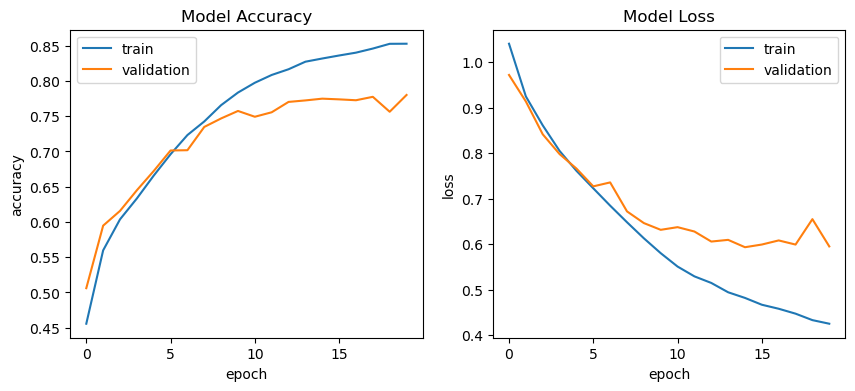

In [29]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

251/251 [==============================] - 4s 10ms/step


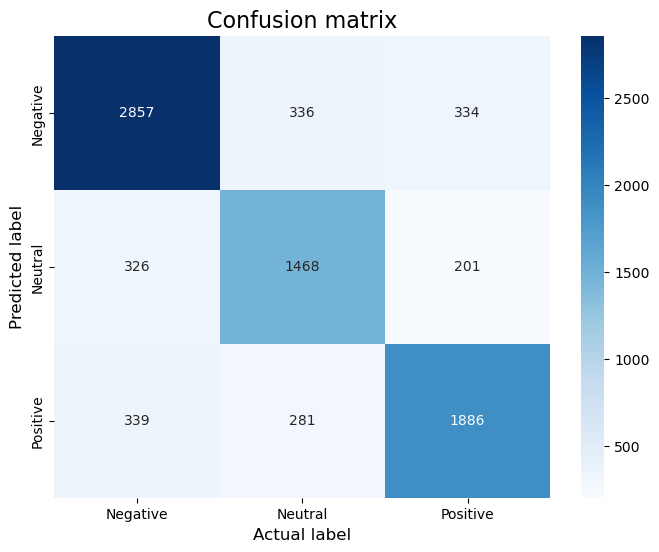

In [30]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [31]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


In [32]:
from keras.models import load_model

# Load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment of the tweet is', sentiment_classes[yt[0]])

In [55]:
predict_class(['"I hate when I have to call and wake people up'])

1/1 [==============================] - 1s 1s/step
The predicted sentiment of the tweet is Negative


In [68]:
predict_class(['I am a big fan of Argentina'])

1/1 [==============================] - 0s 40ms/step
The predicted sentiment of the tweet is Neutral


In [34]:
import tweepy as tw
from tweepy import OAuth1UserHandler, API

#Getting authorization
CONSUMER_KEY = 'MnYGqwr5bielOmBNomvzzSsmd'
CONSUMER_SECRET = 'nopkuReuWnK6anNDzA0OlCVb7qe0PKjalfkl92jhWBSoV5qDi2'
ACCESS_KEY = '816950453124464640-rVg7obI2s5Go3iYAcToScotHK8d8NI2'
ACCESS_SECRET = 'oIKXfzPuxfyZbYr1NfJ4840HCULqKQZgtXTLDNtXrNloB'

auth = OAuth1UserHandler(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
api = API(auth)

In [81]:
QUERY = "Trader Joe's"
tweets = api.search_tweets(QUERY, lang="en", tweet_mode="extended", count=10, result_type="recent")

In [82]:
for tweet in tweets:
    print(tweet.full_text)
    print(predict_class([tweet.full_text]))
    print("-"*15)

I just entered to win the Trader Joe's Holiday Favorites Giveaway from @theramblingjen #giveaway https://t.co/oneHngO6kB
1/1 [==============================] - 0s 17ms/step
The predicted sentiment of the tweet is Positive
None
---------------
I’ve never been punched in the nuts,but I have gone to Trader Joe’s only to find my favorites have been discontinued.. so.. samesies!
1/1 [==============================] - 0s 46ms/step
The predicted sentiment of the tweet is Negative
None
---------------
this Trader Joe’s cold brew is getting me through finals
1/1 [==============================] - 0s 34ms/step
The predicted sentiment of the tweet is Negative
None
---------------
@EmilioEmm The Trader Joe's jokes 😂
1/1 [==============================] - 0s 31ms/step
The predicted sentiment of the tweet is Negative
None
---------------
Trader Joe’s cookie butter ice cream for the mf wiiinnnnn !! 🔥
1/1 [==============================] - 0s 36ms/step
The predicted sentiment of the tweet is Neutral
N